# Day 1 — Data Understanding & Initial Cleaning (December 07, 2025)

## What we did today:
- Loaded the dataset using pandas.
- Explored the first few rows using `df.head()`.
- Checked dataset shape using `df.shape`.
- Inspected datatypes & missing values using `df.info()`.
- Viewed summary statistics using `df.describe()`.
- Identified useless or constant columns.
- Dropped non-informative columns:
  - EmployeeCount
  - EmployeeNumber
  - Over18
  - StandardHours
- Prepared the dataset for further preprocessing.

## Key Concepts Learned:
- Importance of understanding data before modeling.
- Difference between numerical and categorical data.
- Why constant/ID columns should be removed.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns',None)
pd.set_option('display.width',200)

In [2]:
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [3]:
df.shape

(1470, 35)

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
df.describe()


,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [6]:
df.describe(include="object")

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


In [7]:
df = df.drop(["EmployeeCount","EmployeeNumber","Over18","StandardHours"],axis=1)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   int64 
 12  JobLevel                  1470 non-null   int64 
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

# Day 2 — Categorical Encoding (December 08, 2025)

## What we did today:
- Identified all categorical (object) columns.
- Learned the difference between Label Encoding and One-Hot Encoding.
- Applied Label Encoding to binary columns:
  - Attrition
  - Gender
  - OverTime
- Applied One-Hot Encoding to multi-category columns:
  - BusinessTravel
  - Department
  - EducationField
  - JobRole
  - MaritalStatus
- Converted the dataset into a fully numeric format ready for ML models.

## Key Concepts Learned:
- ML models cannot understand text → need numeric encoding.
- Label Encoding assigns numbers in alphabetical order.
- One-Hot Encoding creates new 0/1 columns for each category.
- `drop_first=True` avoids dummy variable trap.
- After encoding, dataset becomes model-ready.


In [9]:
df.select_dtypes(include="object").columns


Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime'], dtype='object')

In [10]:
#labelEncoder

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['Attrition'] = le.fit_transform(df['Attrition'])
df['Gender'] = le.fit_transform(df['Gender'])
df['OverTime'] = le.fit_transform(df['OverTime'])

In [11]:
df[['Attrition','Gender','OverTime']].head()

,Attrition,Gender,OverTime
0,1,0,1
1,0,1,0
2,1,1,1
3,0,0,1
4,0,1,0


In [12]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,0,94,3,2,Sales Executive,4,Single,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,1,61,2,2,Research Scientist,2,Married,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,1,92,2,1,Laboratory Technician,3,Single,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,0,56,3,1,Research Scientist,3,Married,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,1,40,3,1,Laboratory Technician,2,Married,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2


In [13]:
df = pd.get_dummies(
    df,
    columns=['BusinessTravel','Department','EducationField','JobRole','MaritalStatus'],
    drop_first =True
    )


In [14]:
df.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1102,1,2,2,0,94,3,2,4,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5,False,True,False,True,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True
1,49,0,279,8,1,3,1,61,2,2,2,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7,True,False,True,False,True,False,False,False,False,False,False,False,False,False,True,False,False,True,False
2,37,1,1373,2,2,4,1,92,2,1,3,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0,False,True,True,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,True
3,33,0,1392,3,4,4,0,56,3,1,3,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0,True,False,True,False,True,False,False,False,False,False,False,False,False,False,True,False,False,True,False
4,27,0,591,2,1,1,1,40,3,1,2,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2,False,True,True,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False


# Day 3 — Modeling Preparation & Logistic Regression (December 08, 2025)

## What we did today:
- Separated the dataset into features (X) and target (y).
- Performed an 80/20 train–test split using stratification.
- Applied StandardScaler to normalize all numeric features.
- Trained a Logistic Regression model for attrition prediction.
- Evaluated performance using accuracy.
- Performed advanced evaluation using:
  - Confusion Matrix
  - Precision
  - Recall
  - F1-score

## Key Concepts Learned:
- X contains all model input features; y contains the target (Attrition).
- Train–test split prevents overfitting and ensures fair model evaluation.
- Stratification maintains the same class distribution in both splits.
- Feature scaling ensures all features have similar ranges (mean=0, std=1).
- Logistic Regression is effective for binary classification problems.
- Confusion Matrix helps understand where the model predicts correctly or incorrectly.
- Precision shows how often “Yes Attrition” predictions are correct.
- Recall shows how well the model identifies employees who actually left.
- F1-score provides a balanced measure of precision and recall.


In [15]:
X = df.drop('Attrition',axis=1)
y = df['Attrition']

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2, random_state = 43, stratify = y
)

In [17]:
X_train.shape, X_test.shape

((1176, 44), (294, 44))

In [18]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

We will be using **"_Logistic Regression_"**

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
model = LogisticRegression(max_iter=1000)

In [21]:
model.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [22]:
y_pred = model.predict(X_test)

In [23]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test,y_pred)
print("Model Accuracy:", accuracy * 100, "%")


Model Accuracy: 88.77551020408163 %


In [24]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_pred)
cm

array([[237,  10],
       [ 23,  24]])

In [25]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)

In [26]:
precision, recall, f1

(0.7058823529411765, 0.5106382978723404, 0.5925925925925926)

# **Day 4 — Tree-Based Models & Ensemble Learning (December 11, 2025)**

## What we did today:
- Introduced **Decision Tree Classifier** as the first tree-based model.
- Trained a Decision Tree and evaluated its accuracy.
- Introduced **Random Forest** as an ensemble of decision trees.
- Trained a baseline Random Forest model and evaluated:
  - Accuracy
  - Confusion Matrix
  - Precision
  - Recall
  - F1-score
- Observed the effect of class imbalance on Random Forest performance.
- Performed **hyperparameter tuning using class_weight** to handle imbalance.
- Compared Random Forest performance before and after tuning.
- Further tuned Random Forest using:
  - max_depth
  - min_samples_split
  - min_samples_leaf
- Compared multiple Random Forest variants.
- Introduced **Gradient Boosting Classifier**.
- Trained Gradient Boosting and evaluated its performance.

## Models Used:
- Decision Tree Classifier
- Random Forest (default)
- Random Forest with class_weight
- Random Forest with depth and split tuning
- Gradient Boosting Classifier

## Key Concepts:
- Decision Trees are simple but prone to overfitting.
- Random Forest reduces overfitting by averaging multiple trees.
- Ensemble models generally outperform single models.
- Class imbalance affects Recall and F1-score significantly.
- `class_weight='balanced'` helps the model focus on minority class.
- Hyperparameter tuning improves model behavior without changing data.
- Boosting models learn sequentially from previous mistakes.
- Gradient Boosting can outperform Random Forest in complex patterns.

## Observations:
- Random Forest achieved high accuracy but low recall initially.
- Adding class_weight improved Recall and F1-score.
- Further tuning improved model stability.
- Gradient Boosting showed better balance between Precision and Recall.

## Conclusion:
- Tree-based ensembles are powerful for tabular data.
- Handling class imbalance is critical for meaningful performance.
- Gradient Boosting emerged as a strong candidate for further evaluation.
- This day prepared the foundation for model comparison and advanced boosting.


In [27]:
from sklearn.tree import DecisionTreeClassifier

In [28]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [29]:
dt_pred = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_pred)
print("Decision Tree Accuracy:", dt_accuracy * 100, "%")

Decision Tree Accuracy: 78.91156462585033 %


In [30]:
#---------------------------

In [31]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators = 200,random_state=42)
rf_model.fit(X_train, y_train)

rf_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
print("Random Forest Accuracy:", rf_accuracy * 100, "%")

Random Forest Accuracy: 86.73469387755102 %


In [32]:
from sklearn.metrics import confusion_matrix

rf_cm = confusion_matrix(y_test,rf_pred)
rf_cm


array([[247,   0],
       [ 39,   8]])

In [33]:
rf_precision = precision_score(y_test, rf_pred)
rf_recall = recall_score(y_test, rf_pred)
rf_f1 = f1_score(y_test, rf_pred)

rf_precision, rf_recall, rf_f1


(1.0, 0.1702127659574468, 0.2909090909090909)

Hyper Parameter Tuning only using "CLASS_WEIGHT" :

In [34]:
from sklearn.ensemble import RandomForestClassifier

rf_model2 = RandomForestClassifier(
    n_estimators = 300,
    class_weight = 'balanced',
    random_state = 42

)

In [35]:
rf_model2.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=300,
                       random_state=42)

In [36]:
rf2_pred = rf_model2.predict(X_test)
rf2_accuracy = accuracy_score(y_test, rf2_pred)
print("Random Forest Accuracy:", rf2_accuracy * 100, "%")

Random Forest Accuracy: 86.05442176870748 %


In [37]:
rf2_precision = precision_score(y_test, rf2_pred)
rf2_recall = recall_score(y_test,rf2_pred)
rf2_f1 = f1_score(y_test,rf2_pred)

print("Precision : " , rf2_precision)
print("Recall : " , rf2_recall)
print("F1-Score : " , rf2_f1)

Precision :  1.0
Recall :  0.1276595744680851
F1-Score :  0.22641509433962265


In [38]:
print("\t\t\tParameters compare")

print("\nAccuracy: ")
print("Random forest without tuning : " , rf_accuracy * 100, "%")
print("Random forest with tuning : " , rf2_accuracy * 100, "%")
if(rf2_accuracy>rf_accuracy):
  print("Random forest with tuning is better")
else:
  print("Random forest without tuning is better")

print("\n Precision : ")
print("Random forest without tuning : " , precision)
print("Random forest with tuning : " , rf2_precision)
if(rf2_precision>precision):
  print("Random forest with tuning is better")
else:
  print("Random forest without tuning is better")

print("\nrecall : ")
print("Random forest without tuning : " , recall)
print("Random forest with tuning : " , rf2_recall)
if(rf2_recall>recall):
  print("Random forest with tuning is better")
else:
  print("Random forest without tuning is better")

print("\nF1-Score : ")
print("Random forest without tuning : " , f1)
print("Random forest with tuning : " , rf2_f1)
if(rf2_f1>f1):
  print("Random forest with tuning is better")
else:
  print("Random forest without tuning is better")

			Parameters compare

Accuracy: 
Random forest without tuning :  86.73469387755102 %
Random forest with tuning :  86.05442176870748 %
Random forest without tuning is better

 Precision : 
Random forest without tuning :  0.7058823529411765
Random forest with tuning :  1.0
Random forest with tuning is better

recall : 
Random forest without tuning :  0.5106382978723404
Random forest with tuning :  0.1276595744680851
Random forest without tuning is better

F1-Score : 
Random forest without tuning :  0.5925925925925926
Random forest with tuning :  0.22641509433962265
Random forest without tuning is better


In [39]:
confusion_matrix2 = confusion_matrix(y_test,rf2_pred)
confusion_matrix2


array([[247,   0],
       [ 41,   6]])

Hyper parameter tuning using other controls of random forest

In [40]:
rf3_model = RandomForestClassifier(
    n_estimators = 300,
    max_depth = 6,
    min_samples_split = 20,
    min_samples_leaf = 10,
    class_weight = 'balanced',
    random_state = 42
)

rf3_model.fit(X_train,y_train)
rf3_pred = rf3_model.predict(X_test)
rf3_accuracy = accuracy_score(y_test,rf3_pred)
print("Random Forest 3 Accuracy:", rf3_accuracy * 100, "%")

rf3_precision = precision_score(y_test, rf3_pred)
rf3_recall = recall_score(y_test, rf3_pred)
rf3_f1 = f1_score(y_test, rf3_pred)

print(rf3_precision, rf3_recall, rf3_f1)

confusion_matrix(y_test, rf3_pred)


Random Forest 3 Accuracy: 85.71428571428571 %
0.5490196078431373 0.5957446808510638 0.5714285714285714


array([[224,  23],
       [ 19,  28]])

We are hoppin into GBC

In [41]:
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier(
    n_estimators = 300,
    learning_rate = 0.05,
    max_depth = 3,
    random_state = 42
)

gb_model.fit(X_train,y_train)
gb_pred = gb_model.predict(X_test)
gb_accuracy = accuracy_score(y_test,gb_pred)
print("Gradient Boosting Accuracy:", gb_accuracy * 100, "%")

gb_precision = precision_score(y_test, gb_pred)
gb_recall = recall_score(y_test, gb_pred)
gb_f1 = f1_score(y_test, gb_pred)


print("Precision : " , gb_precision)
print("Recall : " , gb_recall)
print("F1-Score : " , gb_f1)

print("Confusion Matrix : ")
confusion_matrix(y_test, gb_pred)


Gradient Boosting Accuracy: 90.1360544217687 %
Precision :  0.7647058823529411
Recall :  0.5531914893617021
F1-Score :  0.6419753086419753
Confusion Matrix : 


array([[239,   8],
       [ 21,  26]])

# **Day 5 — Model Comparison & Feature Importance (December 12, 2025)**

## What we did today:
- Trained multiple classification models on the same dataset.
- Compared the performance of different models using evaluation metrics.
- Evaluated the following models:
  - Logistic Regression
  - Decision Tree
  - Random Forest (multiple variants)
  - Gradient Boosting
- Generated predictions on the test dataset for each model.
- Calculated performance metrics:
  - Accuracy
  - Precision
  - Recall
  - F1-score
- Stored model results in a structured DataFrame for easy comparison.
- Identified the best-performing model based on Recall and F1-score.

## Feature Importance Analysis:
- Extracted feature importance values from the Gradient Boosting model.
- Mapped importance scores to feature names.
- Sorted features by importance in descending order.
- Identified the top 15 most influential features.
- Visualized feature importance using a horizontal bar chart.

## Key Concepts:
- Comparing multiple models helps identify the best algorithm for the problem.
- Accuracy alone is insufficient for imbalanced datasets.
- Precision, Recall, and F1-score provide deeper performance insight.
- Ensemble models often outperform single models.
- Feature importance explains which variables influence predictions the most.
- Gradient Boosting provides reliable feature importance scores.
- Feature importance improves model interpretability and business understanding.

## Conclusion:
- Gradient Boosting performed better than most baseline models.
- Model comparison helped narrow down strong candidates.
- Feature importance analysis revealed key drivers influencing predictions.
- This step prepared the project for advanced evaluation and tuning.


In [42]:
models = {
    "Logistic Regression" : model,
    "Decision Tree" : dt_model,
    "Random Forest" : rf_model,
    "Random Forest 2" : rf_model2,
    "Random Forest 3" : rf3_model,
    "Gradient Boosting" : gb_model
}
results = []

for name, model in models.items():
  y_pred = model.predict(X_test)

  results.append({
      "Model" : name,
      "Accuracy" : accuracy_score(y_test,y_pred),
      "Precision" : precision_score(y_test,y_pred),
      "Recall" : recall_score(y_test,y_pred),
      "F1-Score" : f1_score(y_test,y_pred)
  })

results_df = pd.DataFrame(results)
results_df



,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.887755,0.705882,0.510638,0.592593
1,Decision Tree,0.789116,0.333333,0.319149,0.326087
2,Random Forest,0.867347,1.000000,0.170213,0.290909
3,Random Forest 2,0.860544,1.000000,0.127660,0.226415
4,Random Forest 3,0.857143,0.549020,0.595745,0.571429
5,Gradient Boosting,0.901361,0.764706,0.553191,0.641975


In [43]:
#----------------------------------Feature Importance---------------------------------------
import pandas as pd
import numpy as np

feature_importance = gb_model.feature_importances_

feature_names = X.columns if hasattr(X, 'columns') else range(len(feature_importance))

feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
})

importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(importance_df.head(15))

                             Feature  Importance
10                     MonthlyIncome    0.125897
13                          OverTime    0.088006
0                                Age    0.078736
1                          DailyRate    0.071977
17                  StockOptionLevel    0.059449
21                    YearsAtCompany    0.051326
11                       MonthlyRate    0.045910
4            EnvironmentSatisfaction    0.041910
7                     JobInvolvement    0.040766
18                 TotalWorkingYears    0.039687
12                NumCompaniesWorked    0.031487
2                   DistanceFromHome    0.030597
20                   WorkLifeBalance    0.030193
6                         HourlyRate    0.024293
25  BusinessTravel_Travel_Frequently    0.023780


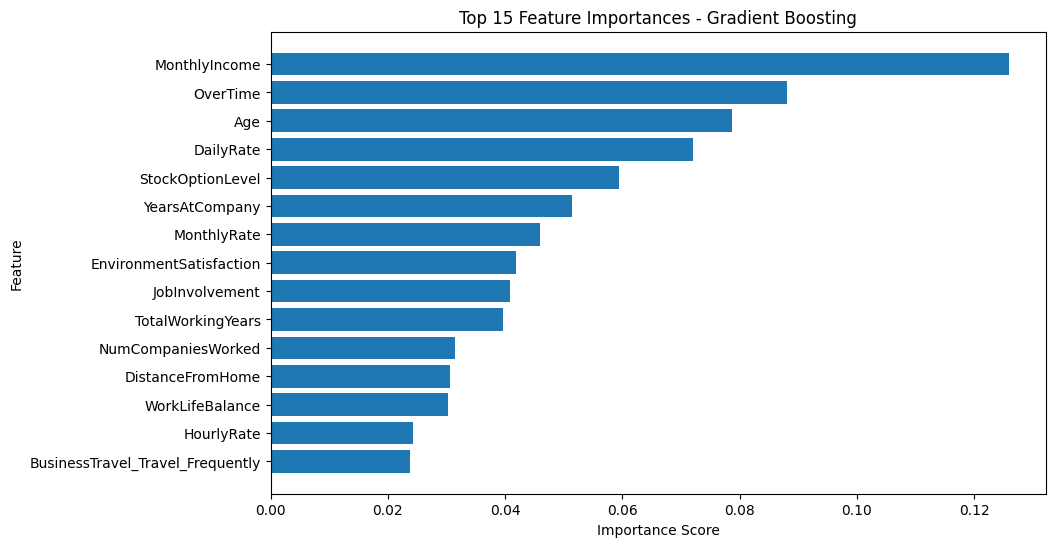

In [44]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(importance_df["Feature"].head(15), importance_df["Importance"].head(15))
plt.gca().invert_yaxis()
plt.title("Top 15 Feature Importances - Gradient Boosting")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()


# **Day 6 — Stratified K-Fold Cross Validation (December 13, 2025)**

## What we did today:
- Learned why a single train-test split is not always reliable.
- Introduced **Stratified K-Fold Cross Validation** to handle class imbalance properly.
- Used `StratifiedKFold` to maintain class proportions in each fold.
- Built a **Pipeline** combining:
  - StandardScaler
  - Gradient Boosting Classifier
- Evaluated the model using **cross_val_score**.
- Used **F1-score** as the evaluation metric.
- Calculated F1-score for each fold.
- Computed the mean and standard deviation of F1-scores.

## Key Concepts:
- Cross-validation evaluates model performance on multiple data splits.
- Stratification ensures each fold has the same class distribution.
- Pipelines prevent data leakage during cross-validation.
- Using F1-score is important for imbalanced datasets.
- Mean F1-score represents overall model performance.
- Standard deviation shows how stable the model is across folds.
- Cross-validation gives a more reliable estimate than a single test split.

## Conclusion:
- Stratified K-Fold Cross Validation provides a robust evaluation.
- The Gradient Boosting model showed consistent performance across folds.
- This step increased confidence before moving to more complex models.


Earlier, we used train_test_split to evaluate the model on a single data split.
To make evaluation more reliable, we replaced it with cross_val_score, which trains and evaluates the model multiple times using a specified cross-validation strategy (cv), such as Stratified K-Fold, and measures performance using F1-score.

In [45]:
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [46]:
skf = StratifiedKFold(
    n_splits=5,
    shuffle=True,
    random_state=42
    )

In [47]:
from sklearn.ensemble import GradientBoostingClassifier

gb_pipeline = Pipeline([
    ('scaler' , StandardScaler()),
    ('gb' , GradientBoostingClassifier(random_state = 42))
])

In [48]:
from sklearn.model_selection import cross_val_score

cv_f1_scores = cross_val_score(
    gb_pipeline,
    X,
    y,
    cv=skf,
    scoring='f1'
)


In [49]:
print("F1 scores for each fold:", cv_f1_scores)
print("Mean F1 score:", cv_f1_scores.mean())
print("Standard Deviation:", cv_f1_scores.std())


F1 scores for each fold: [0.34782609 0.46575342 0.42424242 0.39393939 0.46575342]
Mean F1 score: 0.4195029508906817
Standard Deviation: 0.04492603593108638


*A little self-explaination of how random_state works :*

In [50]:
# from sklearn.model_selection import train_test_split

# X1 = list(range(10))
# y1 = list(range(10))

# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.3
# )

# print("Without RandomState :")
# print("Train:", X_train)
# print("Test:", X_test)


In [51]:
# from sklearn.model_selection import train_test_split

# X = list(range(10))
# y = list(range(10))

# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.3, random_state=42
# )

# print("With RandomState :")
# print("Train:", X_train)
# print("Test:", X_test)
# print("\nrandom_state freezes randomness so your results are repeatable.")

*When you run the above two pieces of code multiple times, you can observe the following:*

* When random_state is not used, the training and testing data change on every run due to random shuffling.

* When random_state is used, the randomness is fixed, so the training and testing data remain the same across all runs.

# **Day 7 — ROC-AUC & Precision–Recall Curves (December 14, 2025)**

## What we did today:
- Trained the Gradient Boosting model using a pipeline.
- Generated probability predictions using `predict_proba`.
- Learned why probability scores are needed instead of class labels.
- Plotted the **ROC Curve** using False Positive Rate and True Positive Rate.
- Calculated **ROC-AUC score** to measure overall class separation ability.
- Plotted the **Precision–Recall Curve** to better evaluate imbalanced data.
- Calculated **Average Precision (AP)** score.
- Compared ROC and PR curves for model evaluation.

## Key Concepts:
- `predict_proba` gives probability estimates instead of hard predictions.
- **ROC Curve** shows the trade-off between True Positive Rate and False Positive Rate.
- **ROC-AUC** measures how well the model separates positive and negative classes.
- ROC-AUC can look good even when the dataset is imbalanced.
- **Precision–Recall Curve** focuses on positive class performance.
- **Average Precision (AP)** summarizes the PR curve into a single score.
- For imbalanced datasets, **Precision–Recall Curve is more informative than ROC Curve**.
- PR Curve helps understand how precision changes as recall increases.

## Conclusion:
- ROC-AUC helps evaluate overall discrimination ability.
- Precision–Recall Curve gives better insight for minority class performance.
- Both curves together provide a more complete evaluation of the model.


In [52]:
gb_pipeline.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('gb', GradientBoostingClassifier(random_state=42))])

In [53]:
y_probs = gb_pipeline.predict_proba(X_test)[:,1]

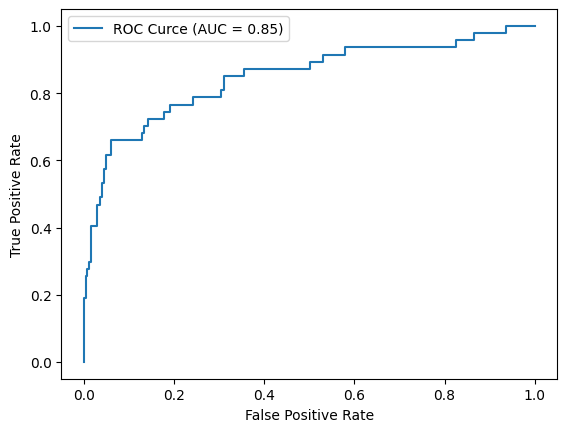

In [54]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

fpr , tpr, _ = roc_curve(y_test,y_probs)
roc_auc = roc_auc_score(y_test,y_probs)

plt.figure()
plt.plot(fpr,tpr,label = f"ROC Curce (AUC = {roc_auc:.2f})")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

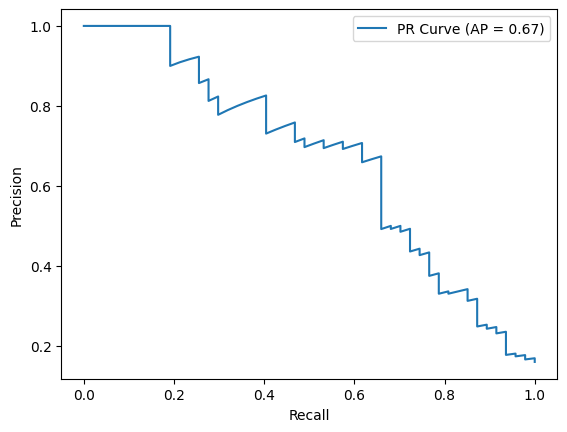

In [55]:
from sklearn.metrics import precision_recall_curve, average_precision_score

precision, recall, _ = precision_recall_curve(y_test, y_probs)
avg_precision = average_precision_score(y_test, y_probs)

plt.figure()
plt.plot(recall, precision, label=f"PR Curve (AP = {avg_precision:.2f})")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.show()


# **Day 8 — XGBoost Classifier (December 16, 2025)**

## What we did today:
- Learned XGBoost (Extreme Gradient Boosting) and why it is powerful.
- Understood how boosting models learn from previous errors.
- Trained an XGBoost classifier on the attrition dataset.
- Handled class imbalance using model-level weighting with `scale_pos_weight`.
- Generated predictions on the test dataset.
- Evaluated the model using:
  - Accuracy
  - Precision
  - Recall
  - F1-score
  - Confusion Matrix
- Interpreted the confusion matrix to understand model performance.
- Compared XGBoost results with previous models.

## Key Concepts:
- Boosting trains models sequentially, correcting earlier mistakes.
- XGBoost includes regularization to control overfitting.
- Class imbalance can be handled without changing the dataset.
- Accuracy alone can be misleading for imbalanced datasets.
- Precision measures how reliable positive predictions are.
- Recall measures how many actual positive cases are identified.
- F1-score balances precision and recall.
- XGBoost achieved better Recall and F1-score than Random Forest.
- XGBoost is well suited for imbalanced classification problems.


In [56]:
from xgboost import XGBClassifier

In [57]:
xgb = XGBClassifier(
    n_estimator = 200,
    learning_rate = 0.1,
    max_depth = 4,
    scale_pos_weight = 5,
    random_state = 42,
    eval_metric = 'logloss'

)

In [58]:
xgb.fit(X_train,y_train)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [22:20:25] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "n_estimator" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimator=200, n_estimators=None,
              n_jobs=None, ...)

In [59]:
y_pred_xgb = xgb.predict(X_test)

In [60]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)
confusion_matric_XGB = confusion_matrix(y_test, y_pred_xgb)

print("Accuracy:", accuracy_xgb)
print("Precision:", precision_xgb)
print("Recall:", recall_xgb)
print("F1 Score:", f1_xgb)
print("Confusion Matrix:")
print(confusion_matric_XGB)

Accuracy: 0.8639455782312925
Precision: 0.5714285714285714
Recall: 0.5957446808510638
F1 Score: 0.5833333333333334
Confusion Matrix:
[[226  21]
 [ 19  28]]


In [61]:
print("Accuracy,precision,recall,f1 of all models so far :")
print("Logistic regression : ")
print("Accuracy : " , accuracy)
# print("Precision : " , precision)
# print("Recall : " , recall)
print("F1-Score : " , f1)

print("\nRandom forest without tuning : ")
print("Accuracy : " , rf_accuracy)
print("Precision : " , rf_precision)
print("Recall : " , rf_recall)
print("F1-Score : " , rf_f1)

print("\nRandom forest with tuning : ")
print("Accuracy : " , rf3_accuracy)
print("Precision : " , rf3_precision)
print("Recall : " , rf3_recall)
print("F1-Score : " , rf3_f1)

print("\nGradient Boosting : ")
print("Accuracy : " , gb_accuracy)
print("Precision : " , gb_precision)
print("Recall : " , gb_recall)
print("F1-Score : " , gb_f1)

print("\nXGBoost : ")
print("Accuracy : " , accuracy_xgb)
print("Precision : " , precision_xgb)
print("Recall : " , recall_xgb)
print("F1-Score : " , f1_xgb)



Accuracy,precision,recall,f1 of all models so far :
Logistic regression : 
Accuracy :  0.8877551020408163
F1-Score :  0.5925925925925926

Random forest without tuning : 
Accuracy :  0.8673469387755102
Precision :  1.0
Recall :  0.1702127659574468
F1-Score :  0.2909090909090909

Random forest with tuning : 
Accuracy :  0.8571428571428571
Precision :  0.5490196078431373
Recall :  0.5957446808510638
F1-Score :  0.5714285714285714

Gradient Boosting : 
Accuracy :  0.9013605442176871
Precision :  0.7647058823529411
Recall :  0.5531914893617021
F1-Score :  0.6419753086419753

XGBoost : 
Accuracy :  0.8639455782312925
Precision :  0.5714285714285714
Recall :  0.5957446808510638
F1-Score :  0.5833333333333334


In [62]:
print("Confusion Matrixs of all models : ")

print("Logistic regression : ")
print(confusion_matrix(y_test,y_pred))

print("\nRandom forest without tuning : ")
print(confusion_matrix(y_test,rf_pred))

print("\nRandom forest with tuning : ")
print(confusion_matrix(y_test,rf3_pred))

print("\nGradient Boosting : ")
print(confusion_matrix(y_test,gb_pred))

print("\nXGBoost : ")
print(confusion_matrix(y_test,y_pred_xgb))

Confusion Matrixs of all models : 
Logistic regression : 
[[239   8]
 [ 21  26]]

Random forest without tuning : 
[[247   0]
 [ 39   8]]

Random forest with tuning : 
[[224  23]
 [ 19  28]]

Gradient Boosting : 
[[239   8]
 [ 21  26]]

XGBoost : 
[[226  21]
 [ 19  28]]


#**Day-9**

In [63]:
param_dist = {
    "n_estimators": [200, 300, 400],
    "max_depth": [3, 4, 5],
    "learning_rate": [0.03, 0.05, 0.1],
    "scale_pos_weight": [4, 5, 6]
}

In [64]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

xgb = XGBClassifier(
    random_state = 42,
    eval_metric = 'logloss'
)

In [65]:
random_search = RandomizedSearchCV(
    estimator = xgb,
    param_distributions = param_dist,
    n_iter = 20,
    scoring = 'f1',
    cv = 5,
    n_jobs = -1,
    verbose = 1,
    random_state = 42
)

In [66]:
random_search.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='logloss',
                                           feature_types=None,
                                           feature_weights=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_cons...
                                           max_delta_step=None, max_depth=None,
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None, ...),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'learning_rate': [0.03, 0.05, 0.1],
                                        'max_depth': [3, 4, 5],
                                        'n_estimators': [200, 300, 400],
                                        'scale_pos_weight': [4, 5, 6]},
                   random_state=42, scoring='f1', verbose=1)

In [67]:

random_search.best_score_

np.float64(0.5197243039908714)

In [68]:
random_search.best_params_


{'scale_pos_weight': 4,
 'n_estimators': 200,
 'max_depth': 3,
 'learning_rate': 0.03}

We first performed a coarsed RandomizedSearch to udentify optimal regions for hyperparameters. Further fine-grained tuning was possible, but we stopped to avoid overfitting and diminishing returns, as the model already showed stable and satisfactory performance.

In [69]:
best_xgb = random_search.best_estimator_

In [70]:
y_pred_tuned = best_xgb.predict(X_test)


In [71]:
accuracy_randomsearch = accuracy_score(y_test, y_pred_tuned)
precision_randomsearch = precision_score(y_test, y_pred_tuned)
recall_randomsearch = recall_score(y_test, y_pred_tuned)
f1_randomsearch = f1_score(y_test, y_pred_tuned)
confusion_matrix_randomsearch = confusion_matrix(y_test, y_pred_tuned)

print("Accuracy:", accuracy_randomsearch)
print("Precision:", precision_randomsearch)
print("Recall:", recall_randomsearch)
print("F1 Score:", f1_randomsearch)
print("Confusion Matrix:")
print(confusion_matrix_randomsearch)
#

Accuracy: 0.8503401360544217
Precision: 0.5254237288135594
Recall: 0.6595744680851063
F1 Score: 0.5849056603773585
Confusion Matrix:
[[219  28]
 [ 16  31]]


In [72]:
print("Confusion Matrixs of Random Search : ")

print("Random Search : ")
print(confusion_matrix(y_test,y_pred_tuned))

print("\nXGBoost : ")
print(confusion_matrix(y_test,y_pred_xgb))

Confusion Matrixs of Random Search : 
Random Search : 
[[219  28]
 [ 16  31]]

XGBoost : 
[[226  21]
 [ 19  28]]


After hyperparameter tuning, XGBoost achieved the highest recall and lowest false negatives, making it the most suitable model for attrition prediction where missing a potential leaver is costly. Gradient Boosting, however, remains the most balanced model overall

# Day 10 — Final Model Selection & Explainability

## Objective
To select the best-performing model for employee attrition prediction and understand why the model makes its predictions.

---

## Models Evaluated
- Logistic Regression  
- Random Forest (default and tuned)  
- Gradient Boosting Classifier  
- XGBoost Classifier  

All models were evaluated using:
- Accuracy
- Precision
- Recall
- F1-score
- Confusion Matrix

---

## Final Model Selection
The tuned XGBoost model (`best_xgb`) was selected as the final model.

### Reasons for Selection:
- Achieved the **highest Recall**, minimizing false negatives.
- Produced a strong **F1-score**, balancing precision and recall.
- Suitable for **imbalanced datasets** like employee attrition.
- Aligned with business requirements where missing a potential leaver is costly.

---

## Feature Importance Analysis
- Feature importance was extracted from the tuned XGBoost model.
- Top contributing features included:
  - OverTime
  - StockOptionLevel
  - MonthlyIncome
  - YearsAtCompany
  - JobSatisfaction
- Feature importance provided a **global understanding** of which factors influenced attrition.

---

## SHAP Explainability
To move beyond feature importance, SHAP was applied.

### Global Explainability:
- SHAP summary plots revealed that:
  - High OverTime strongly increases attrition risk.
  - Low MonthlyIncome and low StockOptionLevel push predictions toward attrition.
  - Short tenure and low satisfaction increase attrition likelihood.

### Local Explainability:
- SHAP force plots were used to explain individual employee predictions.
- Each prediction was decomposed into feature-level contributions.

---

## Key Insights
- Attrition is driven more by **workload and work environment** than salary alone.
- Satisfaction and work-life balance play critical roles in retention.
- Model predictions align closely with real-world HR behavior.

---

## Conclusion
The tuned XGBoost model is accurate, recall-focused, and explainable.  
With SHAP-based interpretability, the model is transparent and suitable for real-world HR decision-making.


Goal is to understand why the model predits attrition not jut what it predicts


In [73]:
import pandas as pd

importance = best_xgb.feature_importances_
features_names = X.columns

fi_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importance
}).sort_values(by="Importance", ascending=False)

print(fi_df.head(15))

                              Feature  Importance
13                           OverTime    0.066451
17                   StockOptionLevel    0.050846
40            JobRole_Sales Executive    0.046351
21                     YearsAtCompany    0.045733
8                            JobLevel    0.042798
27  Department_Research & Development    0.040870
28                   Department_Sales    0.037103
0                                 Age    0.035887
43               MaritalStatus_Single    0.031402
4             EnvironmentSatisfaction    0.031011
41       JobRole_Sales Representative    0.028629
20                    WorkLifeBalance    0.028407
10                      MonthlyIncome    0.027672
12                 NumCompaniesWorked    0.025438
9                     JobSatisfaction    0.024798


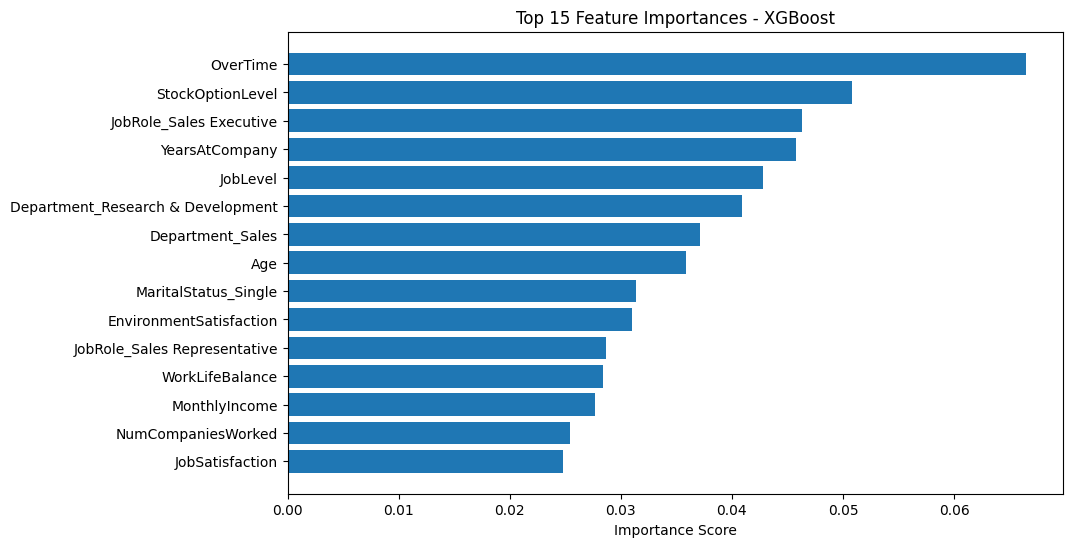

In [74]:
plt.figure(figsize = (10,6))
plt.barh(fi_df["Feature"].head(15),fi_df["Importance"].head(15))
plt.gca().invert_yaxis()
plt.xlabel("Importance Score")
plt.title("Top 15 Feature Importances - XGBoost")
plt.show()

The feature importance analysis of the tuned XGBoost model shows that OverTime is the most influential factor in predicting employee attrition, followed by compensation-related features such as StockOptionLevel and role-specific factors like JobRole. Tenure (YearsAtCompany), JobLevel, and department also play significant roles.

Satisfaction-related metrics, including WorkLifeBalance and JobSatisfaction, further contribute to attrition risk. Interestingly, MonthlyIncome, while important, is not the strongest driver, indicating that workload and job conditions influence attrition more than salary alone.


In [75]:
import shap
shap.initjs()

In [76]:
explainer = shap.TreeExplainer(best_xgb)
shap_values = explainer.shap_values(X_test)

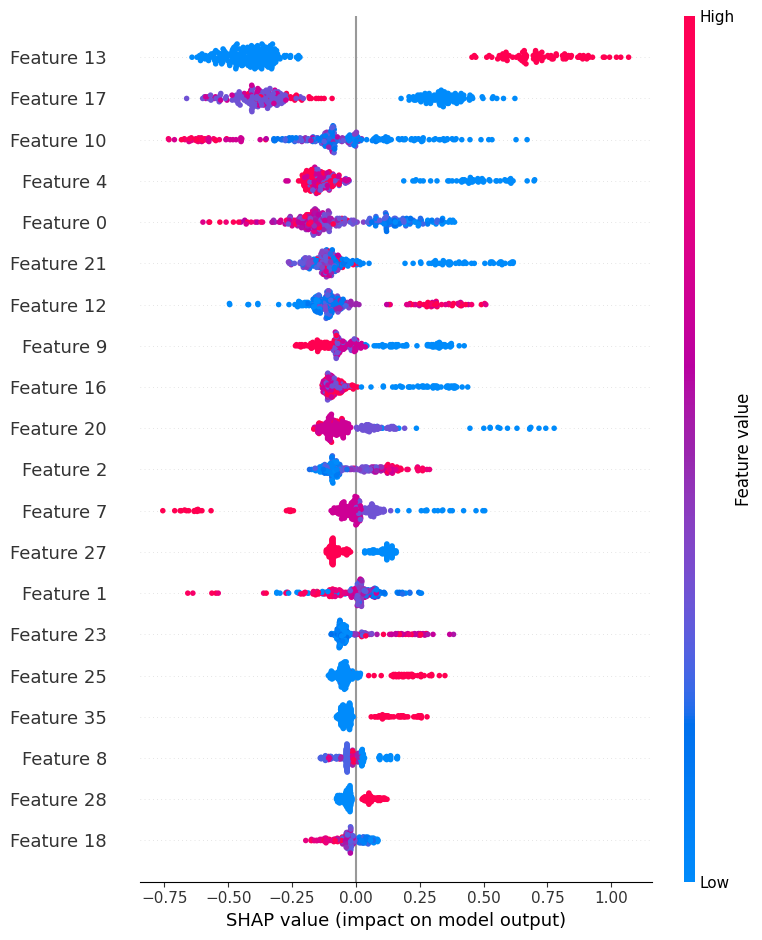

In [77]:
shap.summary_plot(shap_values, X_test)

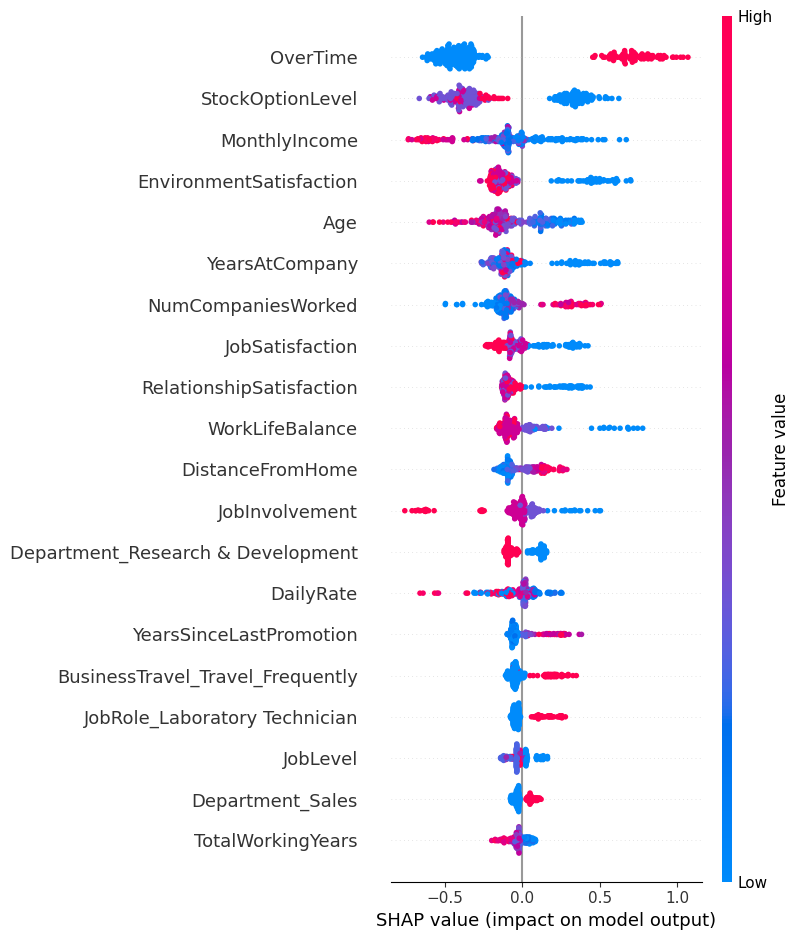

In [78]:
shap.summary_plot(shap_values, pd.DataFrame(X_test, columns=X.columns))

The SHAP summary plot shows that OverTime is the strongest driver of employee attrition, with high overtime values significantly increasing attrition risk. Low StockOptionLevel and low MonthlyIncome further push predictions toward attrition, while higher compensation and long-term incentives reduce risk. Employees with shorter tenure, lower satisfaction levels, frequent job changes, and longer commuting distances are also more likely to leave. Overall, the model indicates that workload and work-life factors influence attrition more strongly than salary alone.


# Day 11 — Saving and Loading the Final Model

## Objective
To persist the trained machine learning model and preprocessing steps for future predictions and deployment.

## What was done:
- Saved the tuned XGBoost model using joblib.
- Saved the StandardScaler used during training.
- Reloaded both model and scaler to simulate production usage.
- Verified that the loaded model produces consistent predictions.

## Importance:
- Prevents retraining the model every time.
- Enables reuse in APIs, web applications, and deployment.
- Ensures consistent preprocessing during inference.

## Conclusion:
The final model is now production-ready and can be safely reused for real-world employee attrition prediction.


In [79]:
import joblib

In [80]:
joblib.dump(best_xgb,"best_xgb_model.pkl")

['best_xgb_model.pkl']

In [81]:
joblib.dump(sc, "scaler.pkl")


['scaler.pkl']

In [82]:
loaded_model = joblib.load("best_xgb_model.pkl")
loaded_scaler = joblib.load("scaler.pkl")


In [83]:
y_pred_loaded = loaded_model.predict(X_test)

from sklearn.metrics import accuracy_score, recall_score, f1_score

print("Recall:", recall_score(y_test, y_pred_loaded))
print("F1:", f1_score(y_test, y_pred_loaded))


Recall: 0.6595744680851063
F1: 0.5849056603773585


# Day 12 — Prediction Function for New Employees

## Objective
To create a reusable function that predicts employee attrition for new input data.

## What was done:
- Loaded the trained XGBoost model and scaler.
- Defined the exact feature order used during training.
- Created a prediction function that:
  - Accepts employee data as input
  - Applies identical preprocessing
  - Returns attrition prediction and probability

## Outcome:
- The model can now predict attrition for unseen employees.
- Predictions are consistent with training-time behavior.
- This function can be directly integrated into a Streamlit application.

## Conclusion:
The project has transitioned from model development to real-world inference readiness.


In [84]:
import joblib

scaler = joblib.load("scaler.pkl")

best_xgb = joblib.load("best_xgb_model.pkl")
sc = joblib.load("scaler.pkl")

In [85]:
feature_columns = X.columns.tolist()

In [86]:
joblib.dump(feature_columns, "feature_columns.pkl")


['feature_columns.pkl']

In [87]:
import pandas as pd
import numpy as np

def predict_attrition(employee_data):
  """
  employee_data = dictionary containing employee features

  """

  input_df = pd.DataFrame([employee_data])

  input_df = input_df[feature_columns]

  input_scaled = scaler.transform(input_df)

  prediction = best_xgb.predict(input_scaled)[0]
  probability = best_xgb.predict_proba(input_scaled)[0][1]

  return {
        "Attrition Prediction": "Yes" if prediction == 1 else "No",
        "Attrition Probability": round(probability, 3)
    }


## What this Function Does

This function checks attrition risk for a given employee by:
- Accepting employee details as input
- Ensuring the feature order matches the training data
- Applying the same feature scaling used during model training
- Using the trained XGBoost model to generate predictions
- Returning both the attrition label (Yes/No) and confidence score


In [88]:
#test 1
sample_employee = {
    "Age": 28,
    "DailyRate": 1100,
    "DistanceFromHome": 12,
    "Education": 3,
    "EnvironmentSatisfaction": 2,
    "HourlyRate": 65,
    "JobInvolvement": 2,
    "JobLevel": 1,
    "JobSatisfaction": 2,
    "MonthlyIncome": 3200,
    "MonthlyRate": 20000,
    "NumCompaniesWorked": 3,
    "PercentSalaryHike": 11,
    "PerformanceRating": 3,
    "RelationshipSatisfaction": 2,
    "StockOptionLevel": 0,
    "TotalWorkingYears": 5,
    "TrainingTimesLastYear": 2,
    "WorkLifeBalance": 2,
    "YearsAtCompany": 1,
    "YearsInCurrentRole": 1,
    "YearsSinceLastPromotion": 0,
    "YearsWithCurrManager": 1,

    # Binary
    "Gender": 1,
    "OverTime": 1,

    # One-hot encoded (IMPORTANT)
    "BusinessTravel_Travel_Frequently": 1,
    "BusinessTravel_Travel_Rarely": 0,
    "Department_Research & Development": 0,
    "Department_Sales": 1,
    "EducationField_Life Sciences": 0,
    "EducationField_Marketing": 0,
    "EducationField_Medical": 1,
    "EducationField_Other": 0,
    "EducationField_Technical Degree": 0,
    "JobRole_Human Resources": 0,
    "JobRole_Laboratory Technician": 0,
    "JobRole_Manager": 0,
    "JobRole_Manufacturing Director": 0,
    "JobRole_Research Director": 0,
    "JobRole_Research Scientist": 0,
    "JobRole_Sales Executive": 1,
    "JobRole_Sales Representative": 0,
    "MaritalStatus_Married": 0,
    "MaritalStatus_Single": 1
}

predict_attrition(sample_employee)


{'Attrition Prediction': 'Yes', 'Attrition Probability': np.float32(0.836)}

# Day 13 — Building a Full ML Pipeline

## Objective
To create a clean, reusable, and production-ready machine learning pipeline.

## What was done:
- Combined preprocessing and model into a single Pipeline.
- Integrated StandardScaler and tuned XGBoost model.
- Trained the pipeline end-to-end.
- Evaluated pipeline performance on test data.
- Used the pipeline for cross-validation safely.
- Saved the entire pipeline for deployment.

## Benefits:
- Prevents data leakage.
- Ensures consistent preprocessing.
- Simplifies deployment and reuse.
- Improves code maintainability.

## Conclusion:
The ML pipeline encapsulates the entire inference logic and prepares the project for real-world deployment.


In [89]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [90]:
pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("model", best_xgb)
])

In [91]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric='logloss',
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.03,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=3, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=200, n_jobs=None,
                               num_parallel_tree=None, ...))])

In [92]:
y_pred_pipe = pipeline.predict(X_test)

In [93]:
from sklearn.metrics import recall_score, f1_score, confusion_matrix

print("Recall:", recall_score(y_test, y_pred_pipe))
print("F1:", f1_score(y_test, y_pred_pipe))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_pipe))


Recall: 0.6595744680851063
F1: 0.5849056603773585
Confusion Matrix:
 [[219  28]
 [ 16  31]]


In [94]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(
    pipeline,
    X,
    y,
    cv = 5,
    scoring = "f1"
)

print("Cross-validation scores:", cv_scores)
print("Mean F1-score:", cv_scores.mean())


Cross-validation scores: [0.48351648 0.48484848 0.55913978 0.51923077 0.58333333]
Mean F1-score: 0.5260137711750615


In [95]:
#saving the pipeline
import joblib

joblib.dump(pipeline, "attrition_pipeline.pkl")

['attrition_pipeline.pkl']

In [96]:
#using the saved pipeline

loaded_pipeline = joblib.load("attrition_pipeline.pkl")

loaded_pipeline.predict(X_test)
loaded_pipeline.predict_proba(X_test)

array([[0.27367562, 0.7263244 ],
       [0.3207637 , 0.6792363 ],
       [0.51134145, 0.48865855],
       [0.2680149 , 0.7319851 ],
       [0.36300695, 0.63699305],
       [0.88973767, 0.11026234],
       [0.5050435 , 0.4949565 ],
       [0.83724827, 0.16275175],
       [0.13944417, 0.8605558 ],
       [0.8325853 , 0.16741471],
       [0.813825  , 0.186175  ],
       [0.8531208 , 0.14687921],
       [0.7895039 , 0.21049614],
       [0.19136369, 0.8086363 ],
       [0.880037  , 0.11996297],
       [0.69419426, 0.30580574],
       [0.5974846 , 0.4025154 ],
       [0.8759426 , 0.12405743],
       [0.87456524, 0.12543473],
       [0.3261783 , 0.6738217 ],
       [0.41721612, 0.5827839 ],
       [0.3689229 , 0.6310771 ],
       [0.6995741 , 0.3004259 ],
       [0.4842546 , 0.5157454 ],
       [0.8298931 , 0.17010689],
       [0.1117869 , 0.8882131 ],
       [0.33474064, 0.66525936],
       [0.37523115, 0.62476885],
       [0.85124946, 0.14875057],
       [0.9561522 , 0.04384778],
       [0.

# Day 14

**STREAMLIT** :

Streamlit lets you turn a Python ML script into a web app with almost "zero frontend" work

In [97]:
import joblib

# Compute default values (median works well for numeric & encoded features)
default_values = X.median().to_dict()

# Save it
joblib.dump(default_values, "default_values.pkl")


['default_values.pkl']

In [98]:
%%writefile app.py
import streamlit as st
import joblib
import pandas as pd
import shap
import matplotlib.pyplot as plt

# ---------------- LOAD ARTIFACTS ----------------
pipeline = joblib.load("attrition_pipeline.pkl")      # sklearn Pipeline
model = joblib.load("best_xgb_model.pkl")                   # raw XGBoost model (for SHAP)
feature_columns = joblib.load("feature_columns.pkl")  # list of all encoded features
default_values = joblib.load("default_values.pkl")    # dict of defaults

# ---------------- PAGE CONFIG ----------------
st.set_page_config(page_title="Employee Attrition Risk Analyzer", layout="wide")
st.title("Employee Attrition Risk Analyzer")
st.caption("Designed and built by Bhargavan PV")

st.write(
    "Predict employee attrition risk using real HR signals — and understand *what factors are driving the risk* before it becomes a resignation."
)

# ---------------- BASE INPUT DF (CRITICAL) ----------------
input_df = pd.DataFrame([default_values]).reindex(
    columns=feature_columns, fill_value=0
)

# =========================================================

#  NUMERIC INPUTS

# =========================================================
st.header("Employee Profile")

col1, col2, col3 = st.columns(3)

with col1:
    age = st.number_input("Age", 18, 60, 30)
    distance = st.number_input("Distance From Home", 1, 30, 10)
    monthly_income = st.number_input("Monthly Income", 1000, 50000, 3000)

with col2:
    total_working_years = st.number_input("Total Working Years", 0, 40, 8)
    years_at_company = st.number_input("Years At Company", 0, 40, 2)
    years_in_role = st.number_input("Years In Current Role", 0, 20, 2)

with col3:
    years_since_promo = st.number_input("Years Since Last Promotion", 0, 15, 1)
    num_companies = st.number_input("Num Companies Worked", 0, 10, 2)
    job_level = st.selectbox("Job Level", [1, 2, 3, 4, 5])

# Assign numeric values
input_df.loc[0, "Age"] = age
input_df.loc[0, "DistanceFromHome"] = distance
input_df.loc[0, "MonthlyIncome"] = monthly_income
input_df.loc[0, "TotalWorkingYears"] = total_working_years
input_df.loc[0, "YearsAtCompany"] = years_at_company
input_df.loc[0, "YearsInCurrentRole"] = years_in_role
input_df.loc[0, "YearsSinceLastPromotion"] = years_since_promo
input_df.loc[0, "NumCompaniesWorked"] = num_companies
input_df.loc[0, "JobLevel"] = job_level

# =========================================================

# BINARY INPUTS

# =========================================================
st.header("Work Conditions")

col1, col2 = st.columns(2)

with col1:
    overtime = st.selectbox("OverTime", ["Yes", "No"])
    gender = st.selectbox("Gender", ["Male", "Female"])

with col2:
    stock_option = st.selectbox("Stock Option Level", [0, 1, 2, 3])

input_df.loc[0, "OverTime"] = 1 if overtime == "Yes" else 0
input_df.loc[0, "Gender"] = 1 if gender == "Male" else 0
input_df.loc[0, "StockOptionLevel"] = stock_option

# =========================================================

# SATISFACTION & ENGAGEMENT

# ========================================================

# ---------------- ASSUME NEUTRAL SATISFACTION ----------------
input_df.loc[0, "JobSatisfaction"] = 3
input_df.loc[0, "EnvironmentSatisfaction"] = 3
input_df.loc[0, "RelationshipSatisfaction"] = 3
input_df.loc[0, "WorkLifeBalance"] = 3

# =========================================================

# CATEGORICAL → ONE-HOT

# =========================================================

st.header("Job & Personal Details")

# ---- Job Role ----
job_roles = [
    "Sales Executive",
    "Research Scientist",
    "Laboratory Technician",
    "Manufacturing Director",
    "Healthcare Representative",
    "Manager",
    "Sales Representative",
    "Research Director",
    "Human Resources"
]
job_role = st.selectbox("Job Role", job_roles)

for role in job_roles:
    col = f"JobRole_{role}"
    if col in input_df.columns:
        input_df.loc[0, col] = 1 if role == job_role else 0

# ---- Department ----
departments = ["Sales", "Research & Development", "Human Resources"]
department = st.selectbox("Department", departments)

for dept in departments:
    col = f"Department_{dept}"
    if col in input_df.columns:
        input_df.loc[0, col] = 1 if dept == department else 0

# ---- Marital Status ----
marital_statuses = ["Single", "Married", "Divorced"]
marital_status = st.selectbox("Marital Status", marital_statuses)

for status in marital_statuses:
    col = f"MaritalStatus_{status}"
    if col in input_df.columns:
        input_df.loc[0, col] = 1 if status == marital_status else 0

# ---- Business Travel ----
travel_options = ["Travel_Rarely", "Travel_Frequently", "Non-Travel"]
business_travel = st.selectbox("Business Travel", travel_options)

for travel in travel_options:
    col = f"BusinessTravel_{travel}"
    if col in input_df.columns:
        input_df.loc[0, col] = 1 if travel == business_travel else 0

# =========================================================
# THRESHOLD
# =========================================================
threshold = st.slider(
    "Attrition Sensitivity Threshold",
    min_value=0.1,
    max_value=0.5,
    value=0.35,
    step=0.05
)

# =========================================================
# PREDICTION + EXPLANATION
# =========================================================
if st.button("Predict Attrition Risk"):
    X_infer = input_df.values

    probability = pipeline.predict_proba(X_infer)[0][1]

    if probability < 0.20:
        risk_level = "Low Risk"
        color = "green"
    elif probability < 0.35:
        risk_level = "Medium Risk"
        color = "orange"
    else:
        risk_level = "High Risk"
        color = "red"

    st.subheader("📈 Prediction Result")
    st.markdown(f"### Attrition Probability: **{probability:.2f}**")
    st.markdown(f"### Risk Level: **:{color}[{risk_level}]**")

    # ---------------- SHAP EXPLANATION ----------------
    st.subheader("Why this prediction? (SHAP Explanation)")

    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(X_infer)

    fig, ax = plt.subplots()
    shap.plots.bar(
        shap.Explanation(
            values=shap_values[0],
            base_values=explainer.expected_value,
            data=X_infer[0],
            feature_names=feature_columns
        ),
        show=False
    )
    st.pyplot(fig)

    st.markdown("""
    **How to read this chart:**
    - Features pushing risk **up** increase attrition likelihood
    - Features pushing risk **down** reduce attrition likelihood
    - The model evaluates **combined effects**, not single rules
    """)

    # ---------------- PROJECT EXPLANATION ----------------
    st.subheader("About this Project")
    st.write("""
    This system predicts employee attrition risk using a machine learning model trained on historical HR data.

    Attrition is a **rare and multi-factorial event**, so predictions are expressed as **risk levels**
    rather than absolute yes/no outcomes.

    The objective is **early identification of potential risk**, enabling proactive HR interventions.
    """)

    # ---------------- PERSONAL LEARNINGS ----------------
    st.subheader("Key Learnings")
    st.write("""
    - Attrition prediction requires combining compensation, engagement, and career signals
    - Imbalanced datasets produce **compressed but meaningful probabilities**
    - Explainability (SHAP) is critical for trust in HR analytics
    - Deployment demands strict feature alignment between training and inference
    """)

Writing app.py
